# Evaluation Project - 10

## Insurance Claims- Fraud Detection

## Problem Statement:
## Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

## Importing requried Libraries

In [2]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')

In [3]:
os.chdir("C:\github_repo\Files")
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We have 1000 rows and 40 columns in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we have 19 numerical and 21 object columns

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In _c39 column all are null so will drop the column

In [8]:
#drop _c39 columns
df.drop('_c39',axis=1,inplace=True)

In [9]:
df.shape

(1000, 39)

In [10]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [11]:
# collision_type, property_damage,police_report_available having '?' so we will replace it with unknown
df=df.replace('?','Unknown')

In [12]:
# Again printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

## STASTICAL SUMMARY

In [13]:
# Lets do statical analysis, Get unique and top values for the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Here we can observe some values are - but for umbrella_limit which is not correct

In [14]:
#having -100000 and having inly one value
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

we can see there is one row in negative value droping the roW

In [15]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,Unknown,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [16]:
# droping this value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [17]:
# dividing ['incident_date] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [18]:
# in incident data all the incident is from 2015 so dropping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)


In [19]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# dropping policy_bind_date  column
df.drop('policy_bind_date',axis=1,inplace=True)


In [20]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [21]:
# dropping the policy_number  and  other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [22]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [25]:
df.shape

(999, 40)

In [26]:
df['fraud_reported'].value_counts()


N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

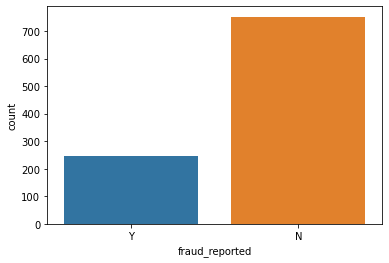

In [27]:
sns.countplot(df['fraud_reported'])


## EDA (EXPLANATORY DATA ANALYSIS)

In [28]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


<AxesSubplot:>

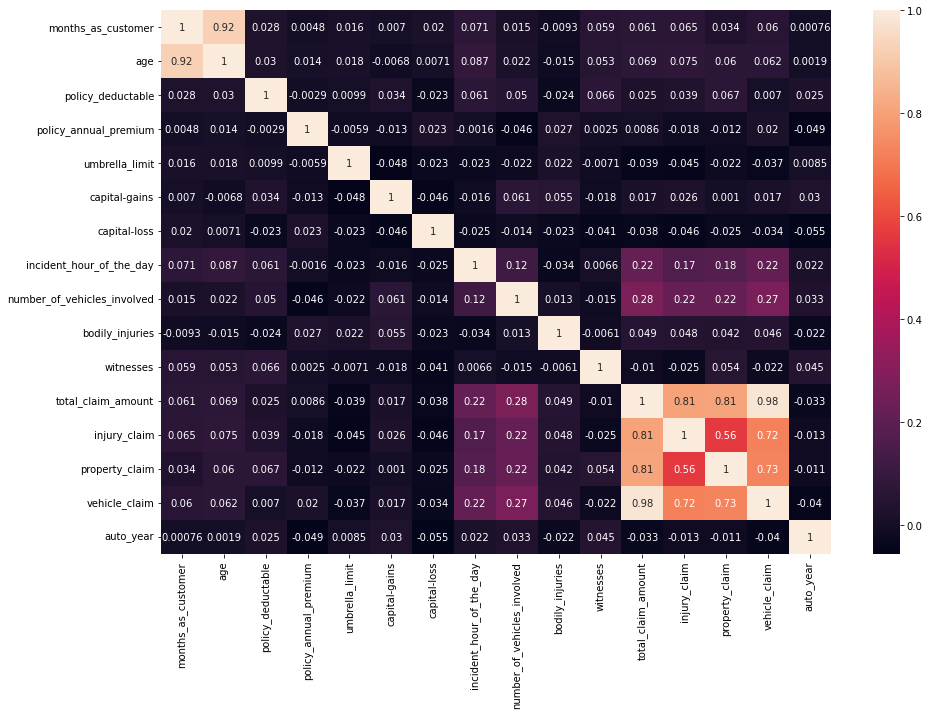

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

We can notice total_claim-amount, injury_claim, property_claim and vehicle_claim are highly correlated with each other, All other are very least correlated with each other

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

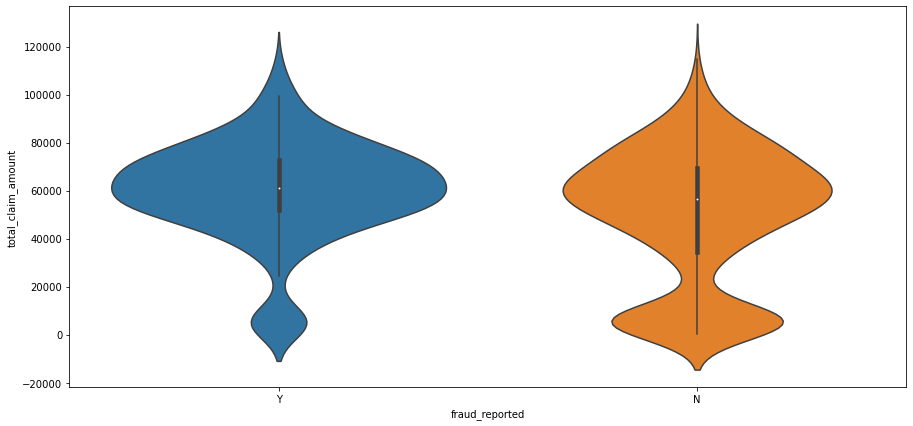

In [30]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

Most of fraud reported found where total claimed amount 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

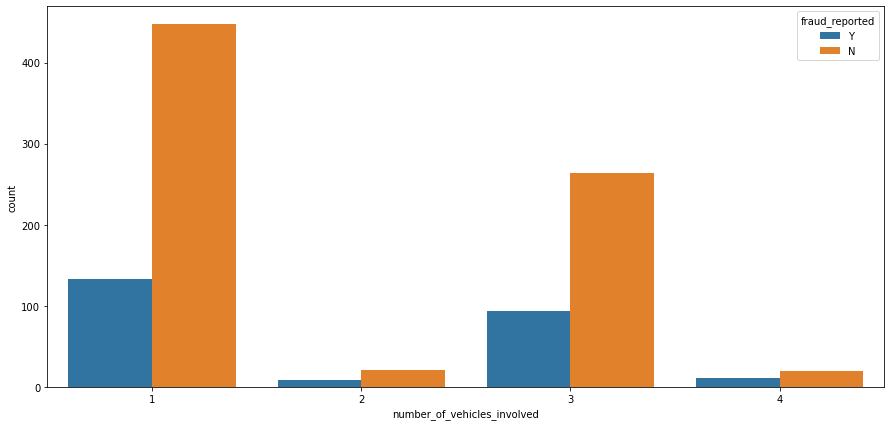

In [31]:
plt.figure(figsize=(15, 7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

Most of fraud report were found where number_of_vehicles_involved more than 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

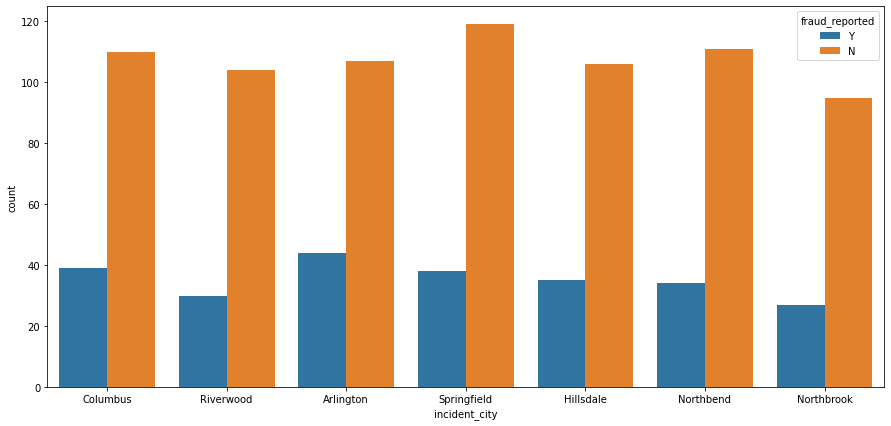

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

In all cities fraud reported count are almost same

<AxesSubplot:xlabel='incident_state', ylabel='count'>

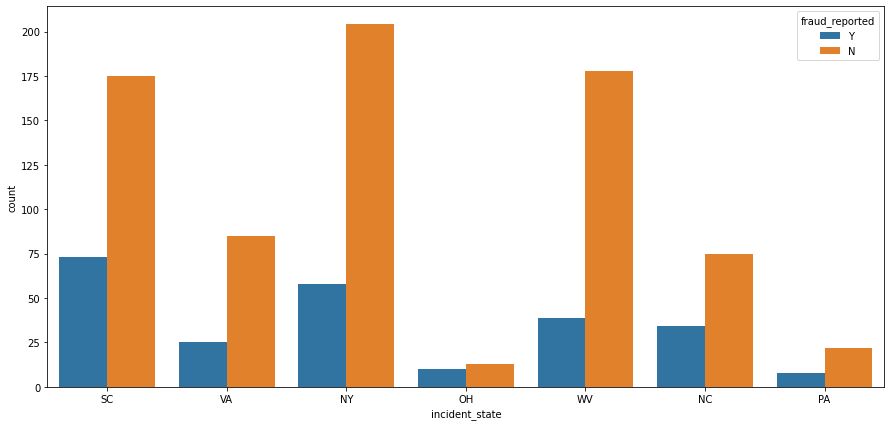

In [33]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)


Most of fraud reported were found where incident state was SC, NY, OH, NC AND PA

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

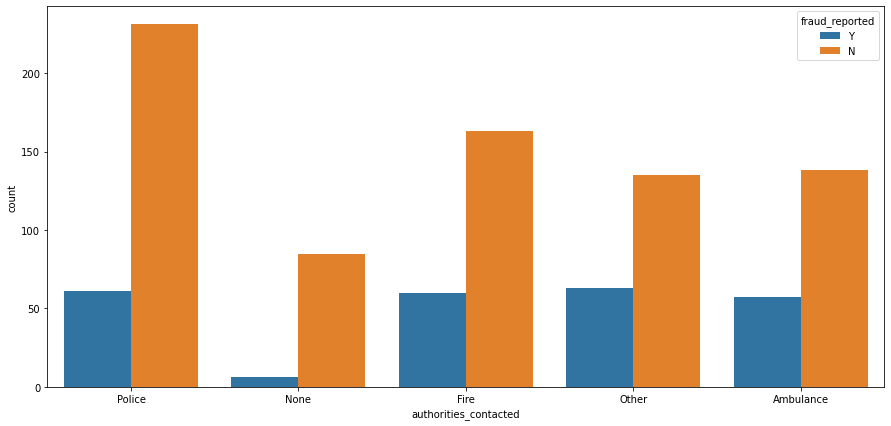

In [34]:
plt.figure(figsize=(15, 7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

Most of fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

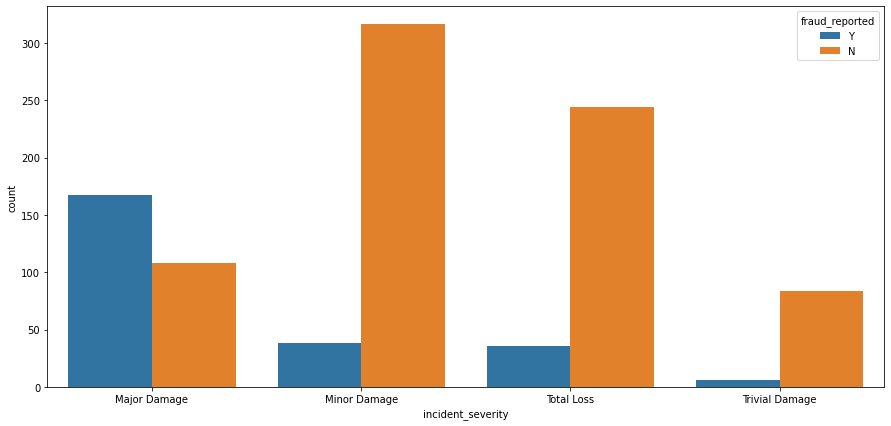

In [35]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

Most of fraud reported claim are Major Damage, most of them are counted as Fraud, there are very fraud report in Trivial damage

<AxesSubplot:xlabel='collision_type', ylabel='count'>

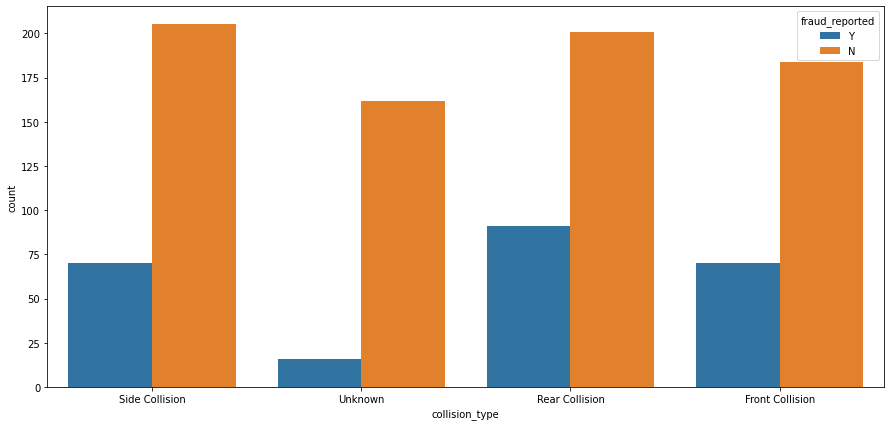

In [36]:
plt.figure(figsize=(15, 7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)


Most of fraud reported claims in Side Collision, Rear Collision and Front Collision, some of reported claim we have those are in no info of collision typ

<AxesSubplot:xlabel='incident_type', ylabel='count'>

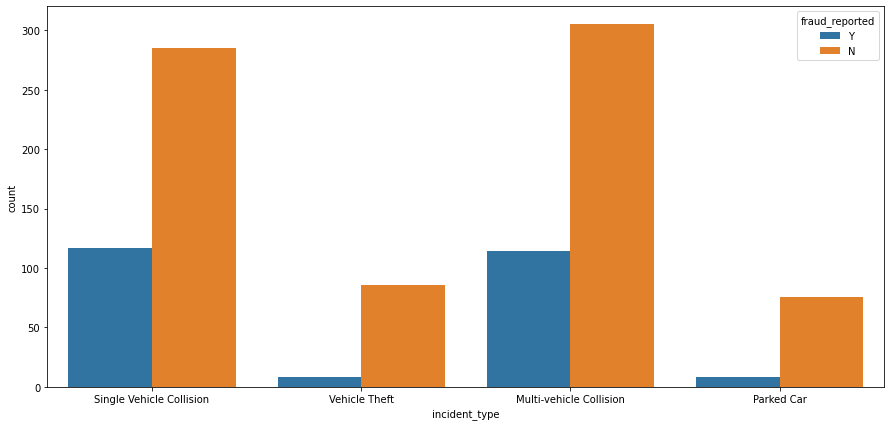

In [37]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

We have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type. In other two incident type vehicle theft and parked car are very less fraud report

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

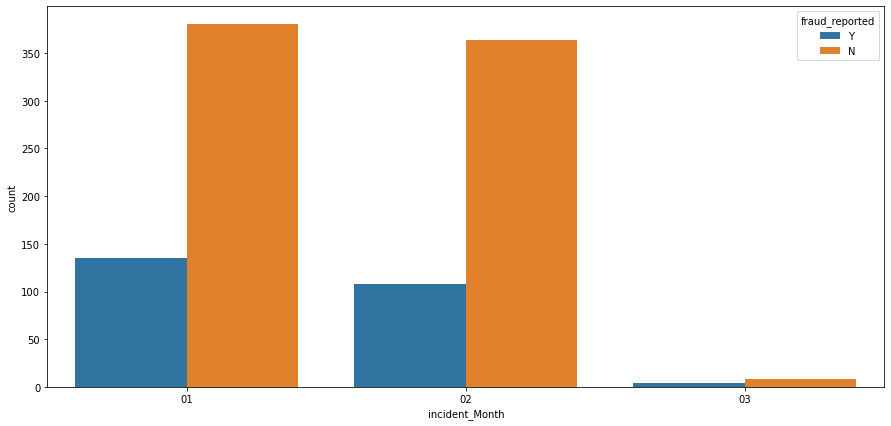

In [38]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

Most of the data we have reported in month 1 and 2 fraud reported are also around same in both months

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

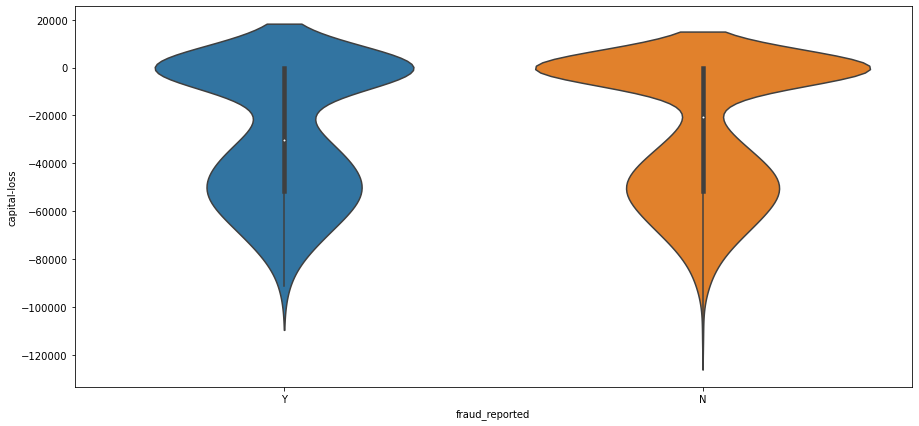

In [39]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)


Most of fraud reported we see in cx those capital loss are and -40000 to -60000

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

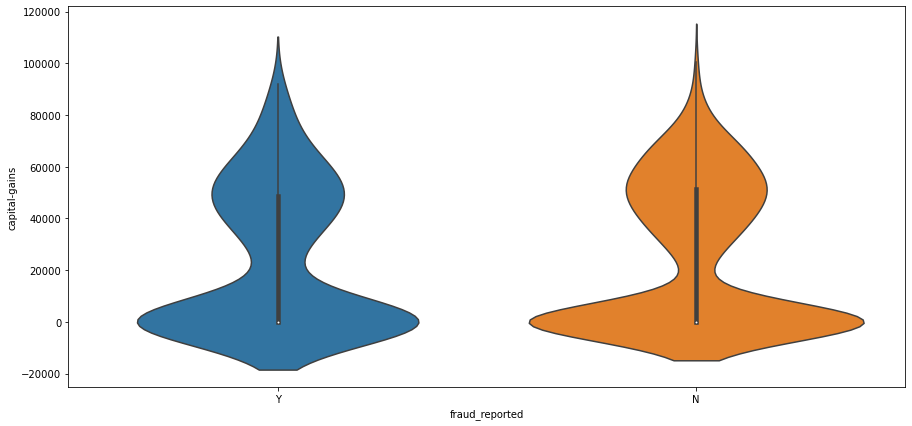

In [40]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)

Most of the fraud reported are in cx those capital gains are 0 and around 50000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

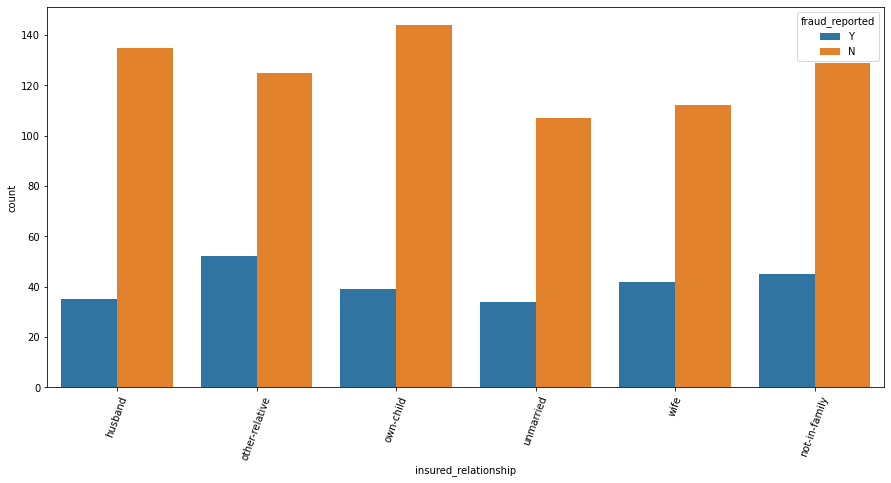

In [42]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

According the data info, cx those having insured relationship with other relative and wife are most reported than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

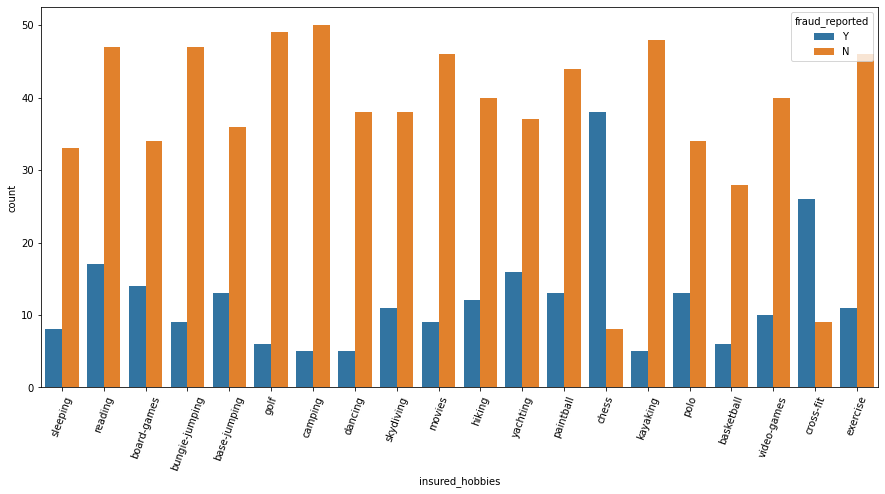

In [43]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)


Here we can see the cx those hobbies are Chess, are most fraud reported cx

Here we can see the cx those hobbies are cross-fit, are also most fraud reported cx

After that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

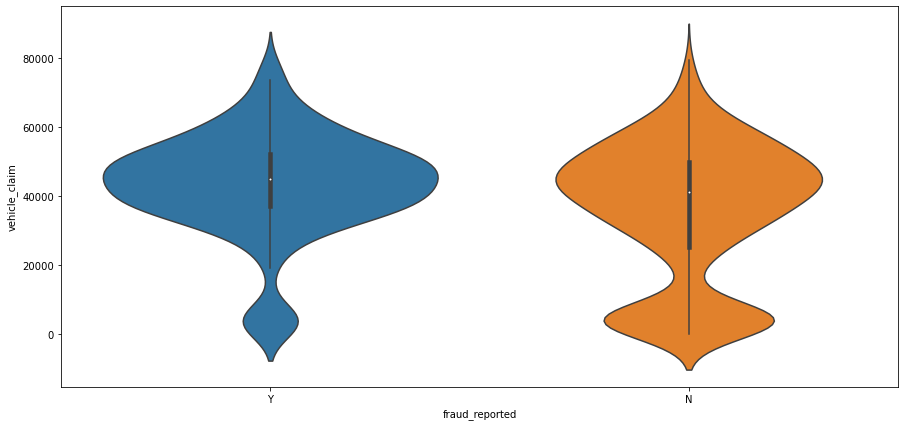

In [44]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

In vehicle_claim most of the cx are between 100 to 6500. fraud report is higher in cx are between 3500 to 5500 vehicle_claim

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

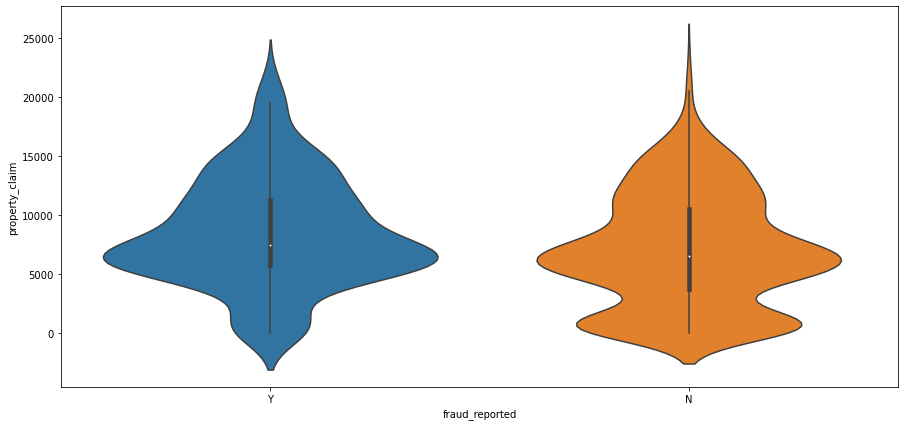

In [45]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

In Propery claim fraud reported is higher in cx claimed of 5000 to 8000

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

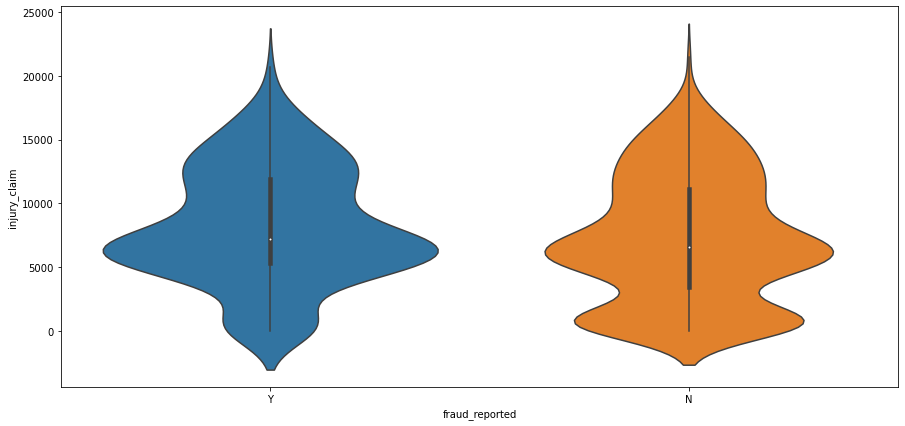

In [46]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

Most of the cx injury claim is 100 to 15000. most fraud reported cx are between 5000 to 8000 injury claim

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

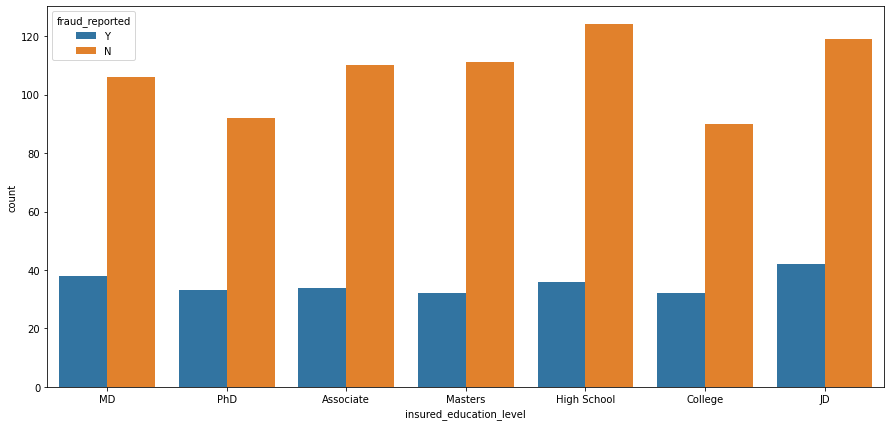

In [47]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

We higher cx those are education level is High School and least cx in PhD ad College

there is very little diffrence in fraud report in all kind of cx

fraued report is little higher in cx those education level is JD, MD, PhD, and College than others

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

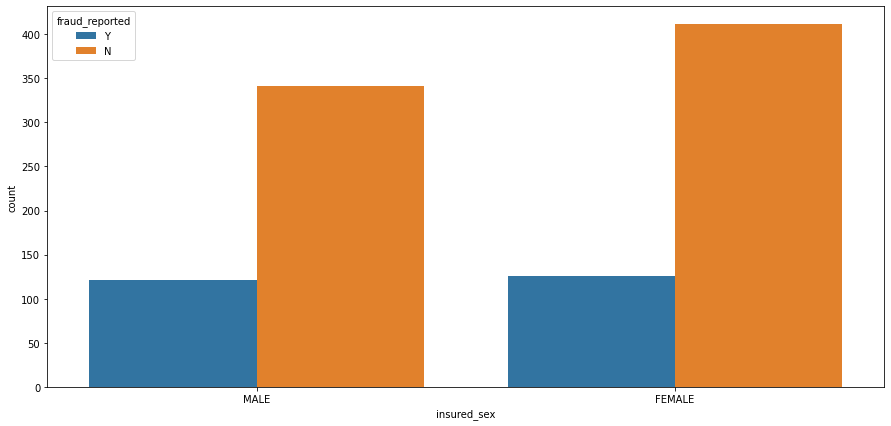

In [48]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

We have more cx in Female than the Male. but fraud reported is little high Male cx

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

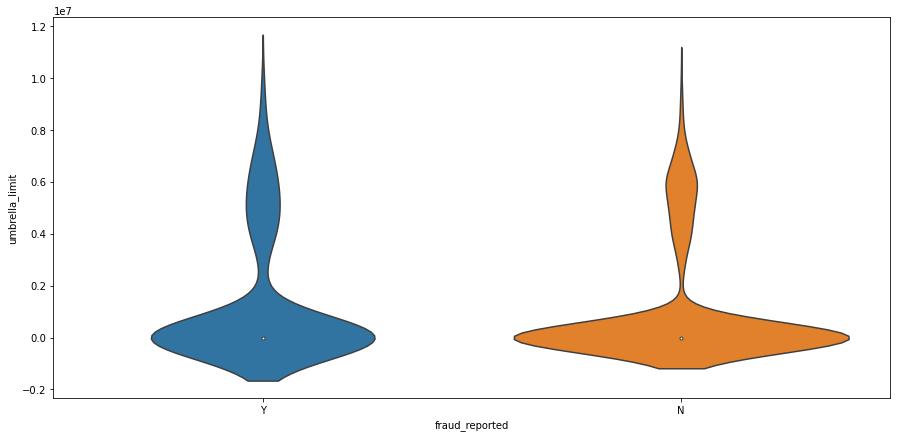

In [50]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data= df )

Most of cx we have their umbrella limit is 0. fraud reported is also high those cx

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

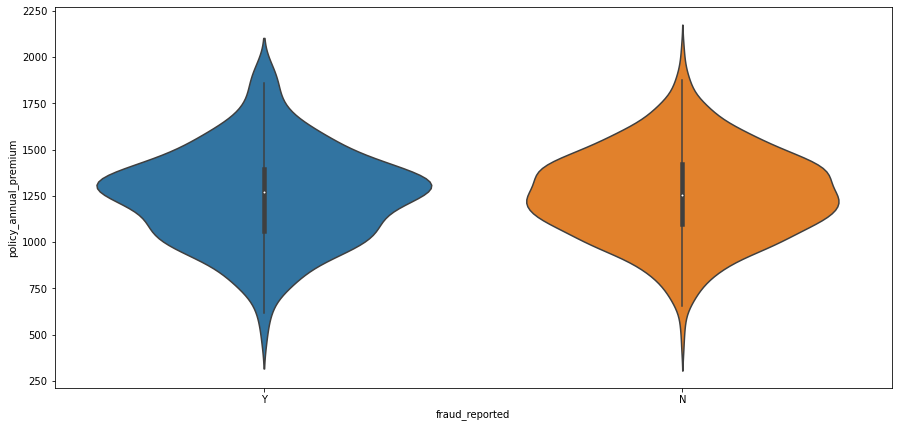

In [51]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data= df )

Most of cx we have 1000 to 1500 of premium payers, most of the fraud reported we found in those premium is 1250 to 1300

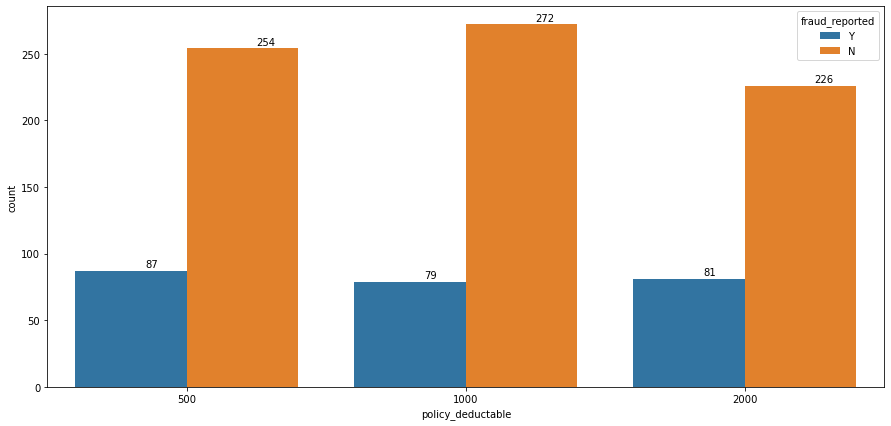

In [52]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data= df )
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Here we notice here according to count fraud report high in cx of 2000 policy_deductable.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

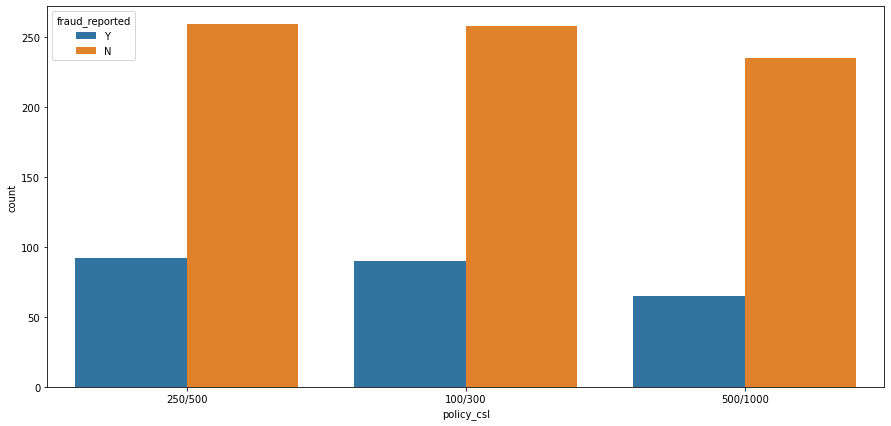

In [53]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_csl',hue='fraud_reported',data= df )

In all three csl we same kind of similarty fraud report is also common in all policy_csl.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

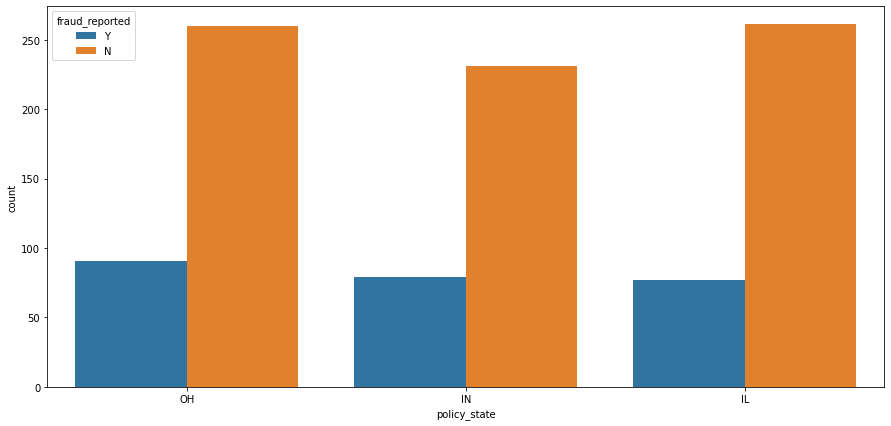

In [54]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_state',hue='fraud_reported',data= df )

we have cx from three states and fraud report almost common in all three states.

<AxesSubplot:xlabel='age', ylabel='count'>

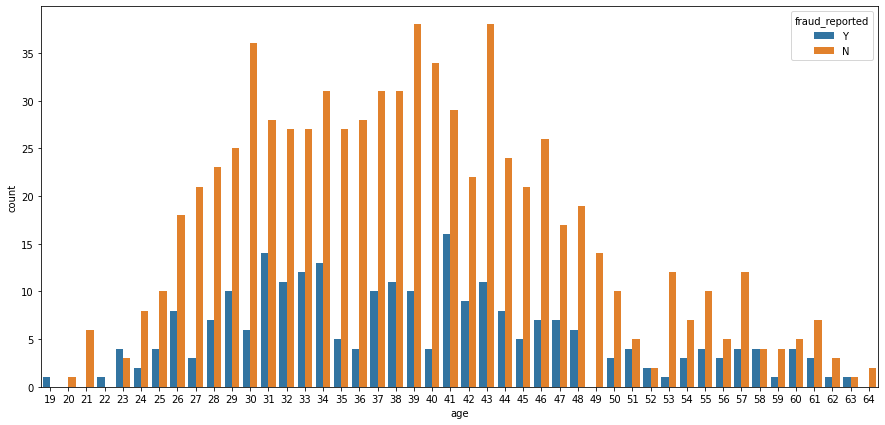

In [56]:
plt.figure(figsize=(15, 7))
sns.countplot(x='age',hue='fraud_reported',data= df )

We see most the cx are age of 26 to 50. fraud report is higher in cx 26 to 50 of age.

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

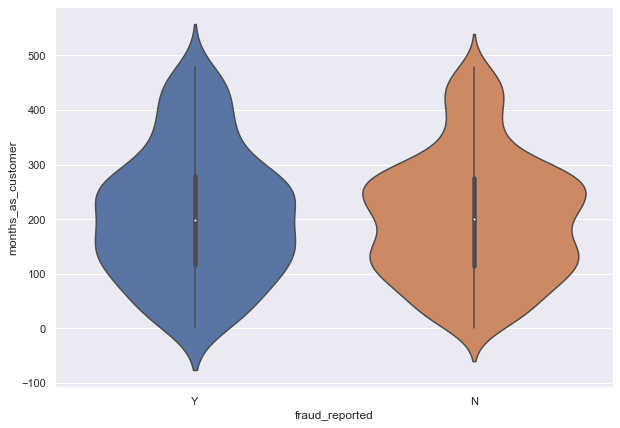

In [58]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= df )

Most of the cx are 100 to 300 months old, We can notice here fraud report is high in cx between 100 to 250 months old.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

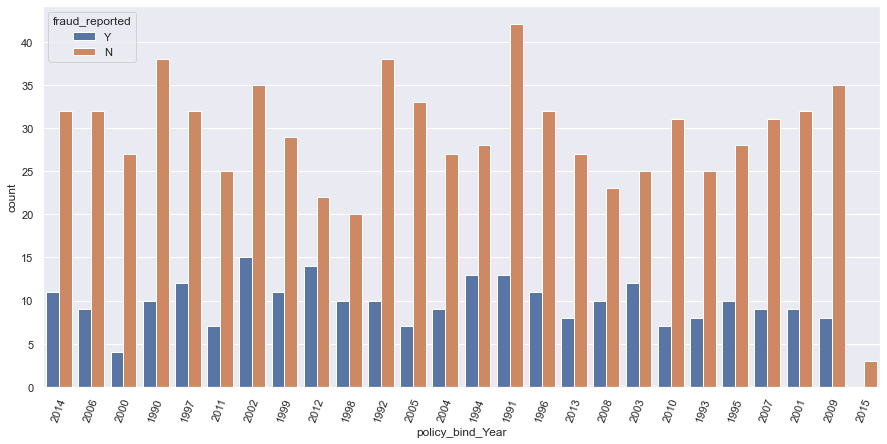

In [59]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

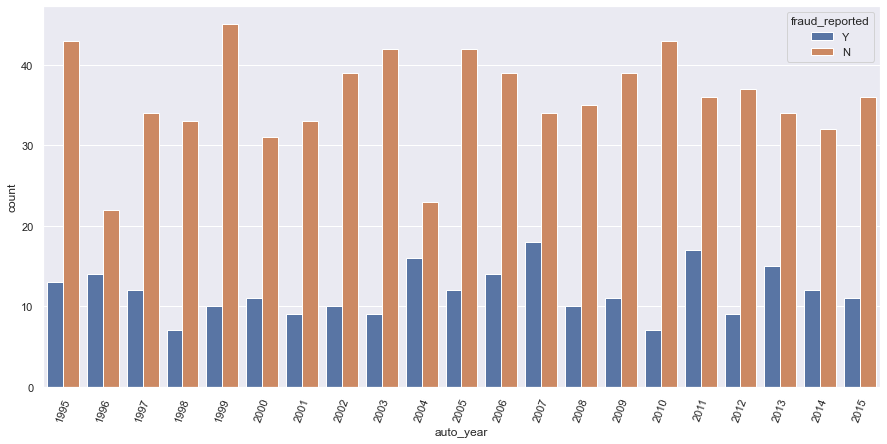

In [60]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

we can notice we have less vehicle from 1996 and 2004 auto year, according to vehice count fraud reported is higher in vehicle of 1996, 2004 , 2007, 2011, 2013, 2014 and etc auto year than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

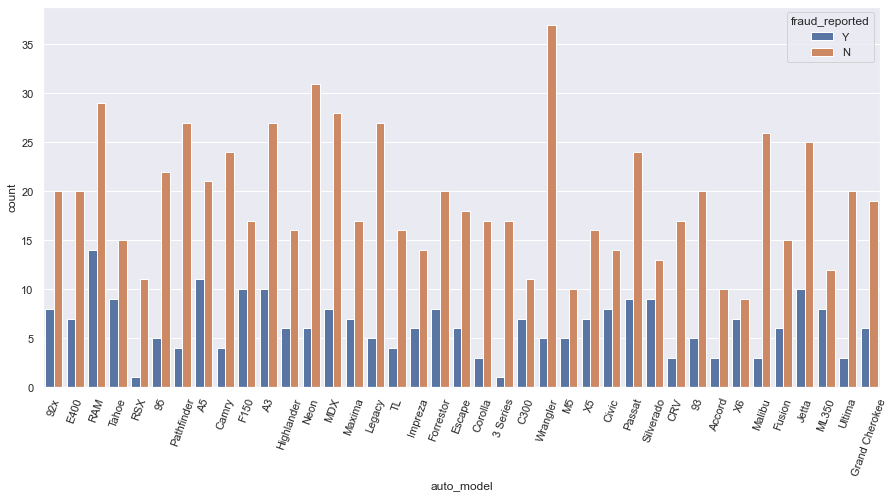

In [61]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

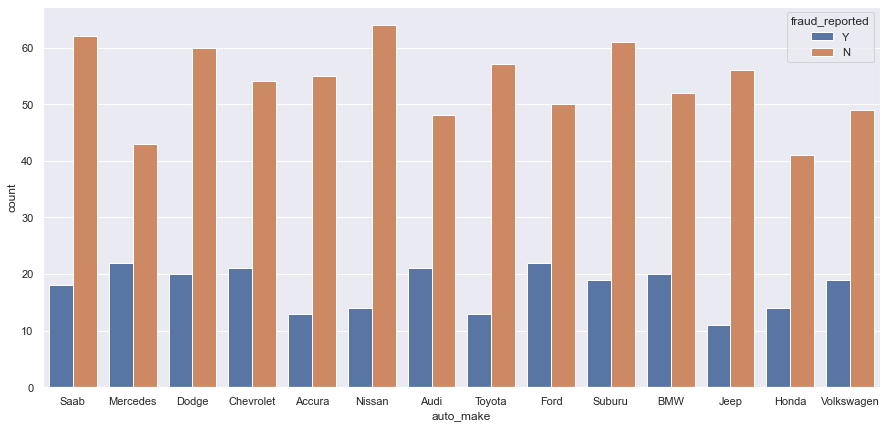

In [62]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make In Other Auto_make brand is less than others

Have done the analysis of all important features, some of features don't have much information to define

Skew and outliers will be handel in numerical numerical columns only

## SKEWNESS

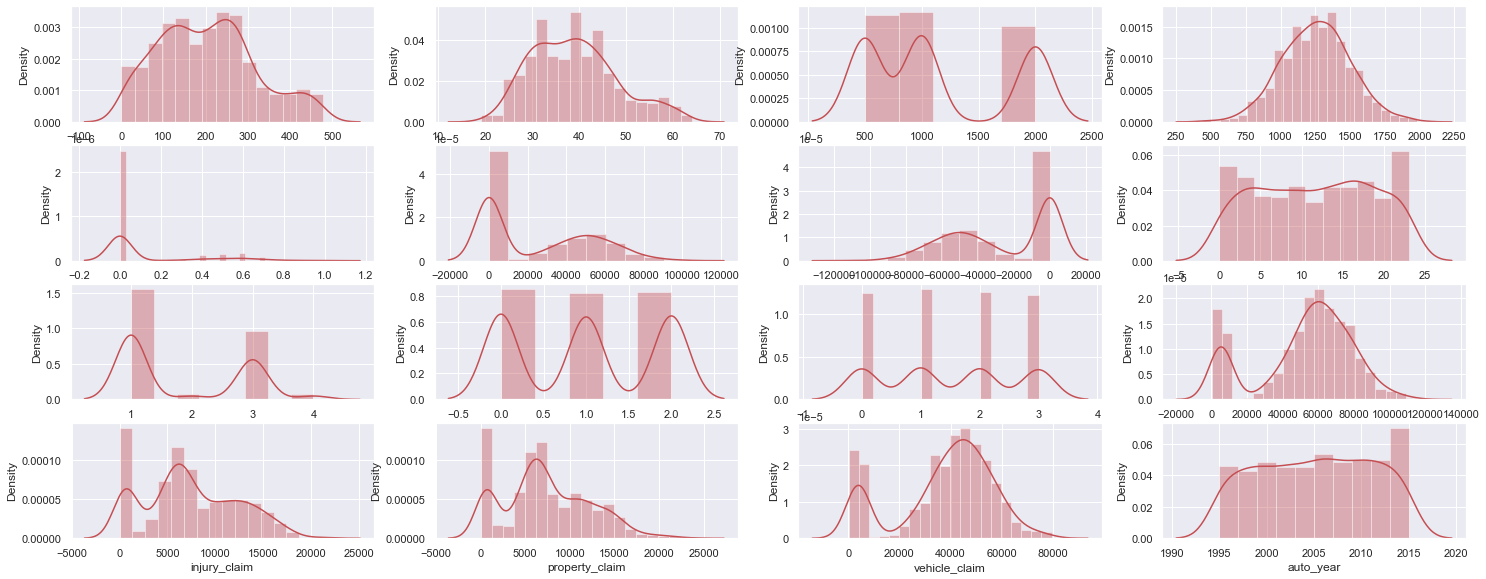

In [63]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [64]:
df.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

skewness more than+/- 0.5 will we treated

object and target variable columns will no be treated

we can see here most of the columns are skewed

will only deal with numercal columns umbrella_limit, total_claim_amount, vehicle_claim

In [65]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

## OUTLIERS

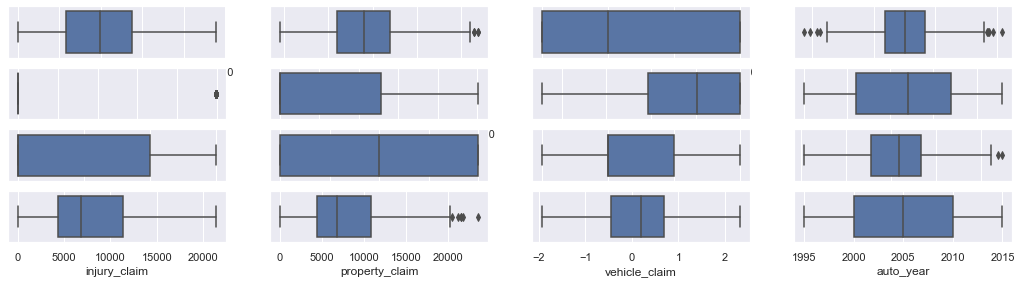

In [66]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed

## Outliers removal

In [67]:
# Z score Method
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))
print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [68]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (999, 40)
After removing outliers:: (994, 40)


## IQR

In [69]:
from scipy import stats 
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR

1230.8691969059628

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(313, 16)


choosing ZSCORE because there is huge dataloss in IQR

Using LabelEncoder for convering categorical to numerical`

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_state                 999 non-null    object 
 3   policy_csl                   999 non-null    object 
 4   policy_deductable            999 non-null    int64  
 5   policy_annual_premium        999 non-null    float64
 6   umbrella_limit               999 non-null    float64
 7   insured_sex                  999 non-null    object 
 8   insured_education_level      999 non-null    object 
 9   insured_occupation           999 non-null    object 
 10  insured_hobbies              999 non-null    object 
 11  insured_relationship         999 non-null    object 
 12  capital-gains                999 non-null    int64  
 13  capital-loss        

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_state                 999 non-null    int32  
 3   policy_csl                   999 non-null    int32  
 4   policy_deductable            999 non-null    int64  
 5   policy_annual_premium        999 non-null    float64
 6   umbrella_limit               999 non-null    float64
 7   insured_sex                  999 non-null    int32  
 8   insured_education_level      999 non-null    int32  
 9   insured_occupation           999 non-null    int32  
 10  insured_hobbies              999 non-null    int32  
 11  insured_relationship         999 non-null    int32  
 12  capital-gains                999 non-null    int64  
 13  capital-loss        

## Dividing data into X and Y

In [75]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [76]:
x.shape

(999, 39)

In [77]:
y.shape

(999,)

## Scaling X values

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [79]:
pd.DataFrame(x).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [80]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.425624,0.443221,0.506507,0.475976,0.424424,0.509827,0.200886,0.462462,0.494828,0.511820,...,0.312203,0.452819,0.503812,0.508219,0.505606,0.466033,0.248248,0.481982,0.505506,0.464424
std,0.240382,0.203208,0.415395,0.402178,0.407893,0.151324,0.400470,0.498839,0.324535,0.309308,...,0.203520,0.235097,0.310410,0.293164,0.300598,0.288800,0.261862,0.293498,0.318294,0.294444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241127,0.288889,0.000000,0.000000,0.000000,0.406288,0.000000,0.000000,0.166667,0.230769,...,0.187579,0.349235,0.230769,0.263158,0.250000,0.216667,0.000000,0.233333,0.181818,0.200000
50%,0.415449,0.422222,0.500000,0.500000,0.333333,0.510271,0.000000,0.000000,0.500000,0.538462,...,0.285171,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.500000,0.545455,0.480000
75%,0.576200,0.555556,1.000000,1.000000,1.000000,0.608564,0.000000,1.000000,0.833333,0.769231,...,0.459231,0.613307,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data have been scalled

Using OverSamling_BorderlineSMOTE

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

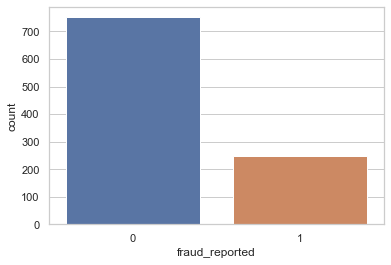

In [81]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [82]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (999,)
Resample Target dataset shape (1504,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

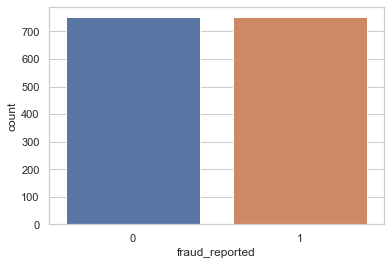

In [83]:
sns.set_style("whitegrid")
sns.countplot(y_rus)


## Spliting Train and Test data

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [86]:
x_train.shape

(1097, 39)

In [87]:
x_test.shape

(407, 39)

In [88]:
y_test.shape

(407,)

In [89]:
y_train.shape

(1097,)

## MODEL BUILDING

In [90]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

## LogisticRegression

In [91]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7367153931339978


In [92]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7321867321867321
[[145  47]
 [ 62 153]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       192
           1       0.77      0.71      0.74       215

    accuracy                           0.73       407
   macro avg       0.73      0.73      0.73       407
weighted avg       0.73      0.73      0.73       407

Training accuracy:: 0.7493163172288059
Test accuracy:: 0.7321867321867321


## DECISION TREE CLASSIFIER

In [93]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8125603543743078


In [94]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8574938574938575
[[156  36]
 [ 22 193]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       192
           1       0.84      0.90      0.87       215

    accuracy                           0.86       407
   macro avg       0.86      0.86      0.86       407
weighted avg       0.86      0.86      0.86       407

Training accuracy:: 1.0
Test accuracy:: 0.8574938574938575


## KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6642392026578073


In [96]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6928746928746928
[[ 73 119]
 [  6 209]]
              precision    recall  f1-score   support

           0       0.92      0.38      0.54       192
           1       0.64      0.97      0.77       215

    accuracy                           0.69       407
   macro avg       0.78      0.68      0.65       407
weighted avg       0.77      0.69      0.66       407

Training accuracy:: 0.7329079307201458
Test accuracy:: 0.6928746928746928


## RandomForestClassifier

In [97]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8717297895902547


In [98]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8697788697788698
[[171  21]
 [ 32 183]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       192
           1       0.90      0.85      0.87       215

    accuracy                           0.87       407
   macro avg       0.87      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

Training accuracy:: 1.0
Test accuracy:: 0.8697788697788698


## Extra Trees Classifier

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et_score=cross_val_score(et,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(et_score))

cross validation score for rfc: 0.9115991140642304


In [100]:
et.fit(x_train,y_train)
predicted_et=et.predict(x_test)
print(accuracy_score(y_test,predicted_et))
print(confusion_matrix(y_test,predicted_et))
print(classification_report(y_test,predicted_et))
print("Training accuracy::",et.score(x_train,y_train))
print("Test accuracy::",et.score(x_test,y_test))

0.9066339066339066
[[173  19]
 [ 19 196]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       192
           1       0.91      0.91      0.91       215

    accuracy                           0.91       407
   macro avg       0.91      0.91      0.91       407
weighted avg       0.91      0.91      0.91       407

Training accuracy:: 1.0
Test accuracy:: 0.9066339066339066


## ADA BOOST CLASSIFIER

In [101]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8613156732891832


In [103]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8796068796068796
[[174  18]
 [ 31 184]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       192
           1       0.91      0.86      0.88       215

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407

Training accuracy:: 0.894257064721969
Test accuracy:: 0.8796068796068796


## HYPER PARAMETER TUNING

In [104]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [105]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [106]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy after parameter tuning:: 0.9090909090909091


In [107]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 5}

In [108]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.5],
     'random_state':[5]   
}

In [109]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [110]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy after parameter tuning:: 0.9017199017199017


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

## Report of GradientBoostingClassifier


In [113]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       192
           1       0.90      0.92      0.91       215

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407



<AxesSubplot:>

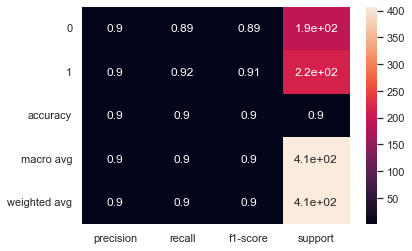

In [114]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [115]:
from sklearn.metrics import roc_auc_score


In [116]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))


roc auc score:: 0.9008478682170542


In [117]:
from sklearn.metrics import roc_curve


In [118]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)


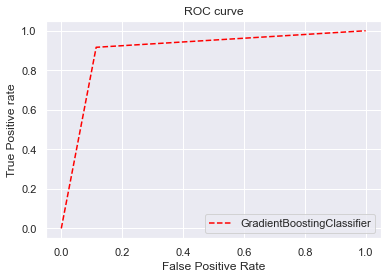

In [119]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## HYPER PARAMETER TUNING:


### ExtraTreesClassifier

In [120]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [121]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 150,
 'n_jobs': -2}

In [122]:
et = ExtraTreesClassifier(class_weight= 'balanced',max_depth = 16,min_samples_split = 3, n_estimators = 300, n_jobs =-2)
et.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=16, min_samples_split=3,
                     n_estimators=300, n_jobs=-2)

In [123]:
#lets check with ExtraTreesClassifier model
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 90.41769041769042%
------------------------------------------------------
Confusion Matrix : 
 [[174  18]
 [ 21 194]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       192
           1       0.92      0.90      0.91       215

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407



## CONCLUSION

### After doing hyper tuning by Extra tree and GradientBoosting, GradientBoosting is giving best best and improved result.

## SAVING MODEL 


In [126]:
import joblib


In [127]:
joblib.dump(best_adb_grid.best_estimator_,'Insurance Claims- Fraud Detection.obj')


['Insurance Claims- Fraud Detection.obj']